In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from research.strings import INSPECTION_ID, DATE, TARGET, PREDICTORS, OTHER_PREDICTORS
from research.evaluation import evaluate_model, show_roc, show_prc
from research.utils import get_crit_mat
from IPython.display import Image

In [6]:
import re
from sklearn.metrics import precision_score, recall_score, f1_score
from time import time
from datetime import datetime

def strip_comments(code):
    code = str(code)
    return re.sub(r'(?m)^ *#.*\n?', '', code)

def compute_metrics(y, pred):
    f1_val = f1_score(y, pred)
    prec_val = precision_score(y, pred)
    rec_val = recall_score(y, pred)
    return f1_val, prec_val, rec_val

def summarize(model, y_train, y_train_pred, y_test, y_test_pred, ep, src):
    f1t, pt, rt = compute_metrics(y_train, y_train_pred)
    f1v, pv, rv = compute_metrics(y_test, y_test_pred)
    s = ""
    s += datetime.now().strftime("%A %m/%d/%y %I:%M %p")
    s += "\nEpochs = {}".format(ep)
    s += "\n-----------"
    s += "\nF1(Train) = {0:.5f}".format(f1t)
    s += "\nPrecision(Train) = {0:.5f}".format(pt)
    s += "\nRecall(Train) = {0:.5f}".format(rt)
    s += "\nF1(Test) = {0:.5f}".format(f1v)
    s += "\nPrecision(Test) = {0:.5f}".format(pv)
    s += "\nRecall(Test) = {0:.5f}".format(rv)
    s += "\n-----------"
    s += "\nPredicts {0:.5f}% True on Train".format(100 * y_train_pred.sum() / len(y_train_pred))
    s += "\nPredicts {0:.5f}% True on Test".format(100 * y_test_pred.sum() / len(y_test_pred))
    s += "\n-----------\n"
    s += strip_comments(src)
    return s

def save_run(model, y_train, y_train_pred, y_test, y_test_pred, ep, src):
    s = summarize(model, y_train, y_train_pred, y_test, y_test_pred, ep, src)
    fname = "runs/model_{}.txt".format(int(time()))
    with open(fname, "w") as file:
        file.write(s + "\n")
    print("Saved run to: {}".format(fname))
    return s

In [7]:
BEST_SPLIT = 15762
d_all = pd.read_csv("data/inspections.csv")
d_train = d_all.query("{} <= {}".format(DATE, BEST_SPLIT))
d_test = d_all.query("{} > {}".format(DATE, BEST_SPLIT))
crit_train = get_crit_mat(d_train)
crit_test = get_crit_mat(d_test)
X_train = d_train[PREDICTORS]
X_test = d_test[PREDICTORS]
y_train = d_train[TARGET]
y_test = d_test[TARGET]

In [8]:
print("Features = {}, Labels = {}".format(len(X_train.columns), len(crit_train.columns)))

Features = 16, Labels = 14


In [233]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

In [348]:
model = Sequential()
model.add(Dense(16, activation="linear", input_shape=(16,)))
model.add(Dropout(0.5))
model.add(Dense(16, activation="linear"))
model.add(Dropout(0.5))
model.add(Dense(14, activation="linear"))

In [349]:
model_source = _i

In [350]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy"
)

In [351]:
n_epochs = 15
hist = model.fit(X_train, crit_train, validation_data=(X_test, crit_test), epochs=n_epochs)

Train on 8121 samples, validate on 10591 samples
Epoch 1/15
8121/8121 [==============================] - 2s 283us/step - loss: 5.2208 - val_loss: 2.4704
Epoch 2/15
8121/8121 [==============================] - 1s 104us/step - loss: 3.8387 - val_loss: 1.9105
Epoch 3/15
8121/8121 [==============================] - 1s 101us/step - loss: 3.1346 - val_loss: 1.4307
Epoch 4/15
8121/8121 [==============================] - 1s 106us/step - loss: 2.5636 - val_loss: 0.7053
Epoch 5/15
8121/8121 [==============================] - 1s 110us/step - loss: 1.9074 - val_loss: 0.2430
Epoch 6/15
8121/8121 [==============================] - 1s 101us/step - loss: 1.4818 - val_loss: 0.2423
Epoch 7/15
8121/8121 [==============================] - 1s 115us/step - loss: 1.1369 - val_loss: 0.2422
Epoch 8/15
8121/8121 [==============================] - 1s 118us/step - loss: 0.9429 - val_loss: 0.2422
Epoch 9/15
8121/8121 [==============================] - 1s 107us/step - loss: 0.7939 - val_loss: 0.2422
Epoch 10/15
812

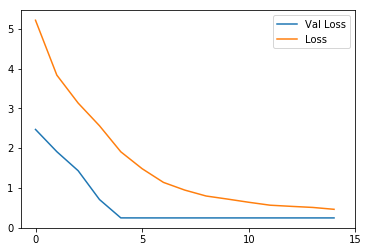

In [352]:
sns.lineplot(x=range(n_epochs), y=hist.history["val_loss"], label="Val Loss")
sns.lineplot(x=range(n_epochs), y=hist.history["loss"], label="Loss")
plt.xticks(range(0, n_epochs + 1, 5))
plt.show()

In [353]:
y_train_pred = (model.predict(X_train).max(axis=1) >= 0).astype(int)
y_test_pred = (model.predict(X_test).max(axis=1) >= 0).astype(int)
s = save_run(model, y_train, y_train_pred, y_test, y_test_pred, n_epochs, model_source)
print(s)

Saved run to: runs/model_1553030581.txt
Tuesday 03/19/19 04:23 PM
Epochs = 15
-----------
F1(Train) = 0.00000
Precision(Train) = 0.00000
Recall(Train) = 0.00000
F1(Test) = 0.00000
Precision(Test) = 0.00000
Recall(Test) = 0.00000
-----------
Predicts 0.00000% True on Train
Predicts 0.00000% True on Test
-----------
model = Sequential()
model.add(Dense(16, activation="linear", input_shape=(16,)))
model.add(Dropout(0.5))
model.add(Dense(16, activation="linear"))
model.add(Dropout(0.5))
model.add(Dense(14, activation="linear"))


/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


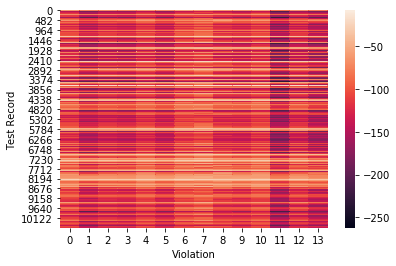

In [354]:
sns.heatmap(model.predict(X_test))
plt.xlabel("Violation")
plt.ylabel("Test Record")
plt.show()

In [355]:
import pickle
from research.metrics import to_inspection_daynum, show_metrics, compare_metrics

In [356]:
y_true = d_test[TARGET]
days = to_inspection_daynum(d_test["Inspection_Date"])
city = pickle.load(open("models/sklearn-glm.pkl", "rb"))
evaluate_model(y_true, city.predict(X_test))

F1 Score = 0.04084
Precision = 0.50769
Recall = 0.02128


,Predicted +,Predicted -
Actual +,33,1518
Actual -,32,9008


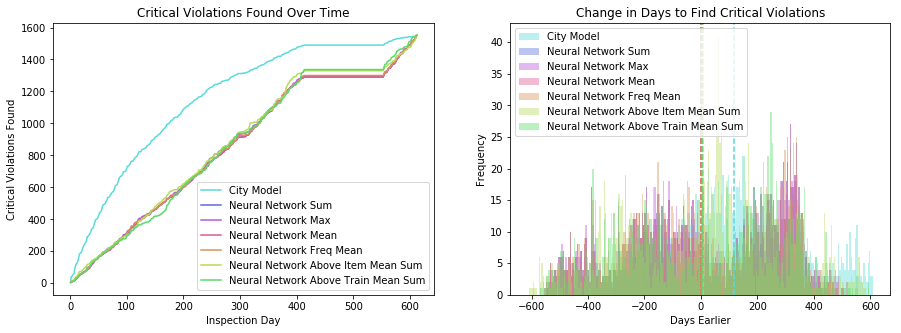

,Model,First Half,Mean Change,Std. Change
0,City Model,0.778,117.912,227.220
5,Neural Network Above Item Mean Sum,0.492,7.818,265.219
2,Neural Network Max,0.482,2.455,264.276
4,Neural Network Freq Mean,0.474,0.760,264.260
6,Neural Network Above Train Mean Sum,0.470,3.551,270.381
1,Neural Network Sum,0.470,-0.926,265.738
3,Neural Network Mean,0.470,-0.926,265.738


In [357]:
compare_metrics(
    y_true, days,
    [
        ("City Model", city.predict_proba(X_test)[:,1]),
        ("Neural Network Sum", model.predict(X_test).sum(axis=1)),
        ("Neural Network Max", model.predict(X_test).max(axis=1)),
        ("Neural Network Mean", model.predict(X_test).mean(axis=1)),
        ("Neural Network Freq Mean", np.dot(crit_train.mean(axis=0), model.predict(X_test).T)),
        ("Neural Network Above Item Mean Sum", np.array([vec >= vec.mean() for vec in model.predict(X_test)]).astype(int).sum(axis=1)),
        ("Neural Network Above Train Mean Sum", (model.predict(X_test) > model.predict(X_train).mean(axis=0)).astype(int).sum(axis=1))
    ]
)

In [275]:
# model.save("models/model_1553030150.h5")